## This is a job interview a friend of mine got. I took the dataset and the questions and worked on the solution on my own. I hope that the answers are right, and/or close to what they should be.

## I have removed any indication of which company this interview belongs to

In [1]:
import numpy as np

"""
Python Test

Overview:
You are the Revenue Optimization Analyst for a brand new LCC
So far, the airline has been using a simple pricing strategy - and 4 different "starting fares" as an experiment
to see which would work best. This can be seen in the function "pricingSystem".
"simulateFlights" and "calculateSales" are used to simulate what happens when these pricing strategies are put 
to action

the data:
startingFares: an array showing the fare the 1000 flights began at
bookingHistory: number of bookings in each period
There are 10 periods, 0 is when the flight is first on sale, 9 is the last period before departure
Elasticity and expected number of bookings change throughout the periods
Each flight can fit a max of 100 passengers
fareHistory: the fare that was charged


Python functions that would be useful to brush up on for this test:
For loops
If statements
Numpy: sum, mean, cumsum, zeros
Working with arrays: indexing, slicing, boolean indexing



"""

def calculateSales(period,fare):
    table = [[10948.203698364247, -1.7618718586337401],
         [12316.724154672282, -1.7618717557777104],
         [27227.757147460881, -1.9069276555536103],
         [27227.757147460881, -1.9069276555536103],
         [31923.373918589208, -1.9259216939097417],
         [96784.984473477307, -2.1392197997378548],
         [222801.30985081987, -2.2737725815790211],
         [473224.98690729542, -2.4112936860531948],
         [40392.333438497895, -1.8195040367267661],
         [18371.836652604059, -1.6465484040077045]]
    a = table[period][0]
    b = table[period][1]
    seatsSold1 = max(0.0,a*fare**b)
    seatsSold2 = np.random.poisson(seatsSold1)
    if seatsSold1 == seatsSold2:
        return seatsSold1
    elif seatsSold2 > seatsSold1:
        seatsSold2 = seatsSold2 + np.round((seatsSold1-seatsSold2-.5)/2.0,0)
    else:
        seatsSold2 = seatsSold2 + np.round((seatsSold1-seatsSold2+.5)/2.0,0)
    return seatsSold2

def pricingSystem(bookings,startingFare):
    if sum(bookings) < 60:
        fare = startingFare
    elif sum(bookings) < 70:
        fare = startingFare + 10
    elif sum(bookings) < 80:
        fare = startingFare + 15
    elif sum(bookings) < 90:
        fare = startingFare + 25
    else:
        fare = startingFare + 50
    return fare

def simulateFlights():
    numberOfFlights = 1000
    startingFares = np.ones(numberOfFlights,float)
    startingFares[:250] = 65
    startingFares[250:500] = 68
    startingFares[500:750] = 71
    startingFares[750:] = 74
    bookingHistory = np.zeros([numberOfFlights,10],float)
    fareHistory = np.zeros([numberOfFlights,10],float)
    for flightNum in range(numberOfFlights):
        for period in range(10):
            fareHistory[flightNum,period] = pricingSystem(bookingHistory[flightNum,:],startingFares[flightNum])
            tempBookings = calculateSales(period,fareHistory[flightNum,period])
            if tempBookings + np.sum(bookingHistory[flightNum,:]) <= 100.0:
                bookingHistory[flightNum,period] = tempBookings
            else:
                bookingHistory[flightNum,period] = 100.0 - sum(bookingHistory[flightNum,:])
    return startingFares,bookingHistory,fareHistory

np.random.seed(19)
startingFares,bookingHistory,fareHistory = simulateFlights()

In [2]:
def question0(bookingHistory):
    """
    example question
    What percent of flights sold out?
    Answer can be a decimal or a percentage
    """
    answer = float(sum(np.sum(bookingHistory,1)==100.0)) / bookingHistory.shape[0]
    return answer

print (question0(bookingHistory))

0.365


In [3]:
def question1(bookingHistory,fareHistory):
    """
    Easy
    Which pricing strategy was the best?
    Answer can be a number or text
    """
    
    final_sales = np.zeros(shape=[1000,1])
    
    for row in range(fareHistory.shape[0]):
        sum = 0
        for col in range(fareHistory.shape[1]):
            sum += (fareHistory[row][col] * bookingHistory[row][col])
        final_sales[row] = sum
    
    averages = np.split(final_sales,4)            
    answer = max(np.mean(averages,axis=1))
    
    return answer

print(question1(bookingHistory,fareHistory))

[7403.38]


In [4]:
def question2(bookingHistory,fareHistory):
    """
    Easy
    Assuming the average passenger has an additional $20 in ancillary revenue which pricing strategy is the best?
    Answer can be a number or text
    """
    
    final_sales = np.zeros(shape=[1000,1])
    
    for row in range(fareHistory.shape[0]):
        sum = 0
        for col in range(fareHistory.shape[1]):
            sum += ((fareHistory[row][col]+20) * bookingHistory[row][col])
        final_sales[row] = sum
    
    averages = np.split(final_sales,4)            
    answer = max(np.mean(averages,axis=1))

    return answer

print(question2(bookingHistory,fareHistory))

[9351.012]


In [5]:
# For question 3
import matplotlib.pyplot as plt

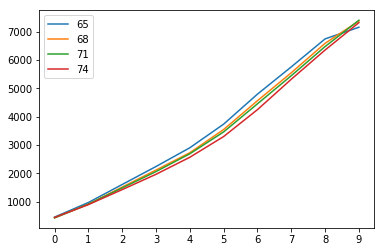

<Figure size 1440x1440 with 0 Axes>

In [66]:
def getAverage(a):
    return np.mean(a)

def question3(fareHistory,bookingHistory):
    """
    Medium
    Without performing an in depth analysis (That will happen in question 5)
    Create a report, graph, table or chart that would help the pricing team improve their pricing.
    """
    rate_of_sales = np.zeros(shape=[1000,10])
    
    for row in range(fareHistory.shape[0]):
        for col in range(fareHistory.shape[1]):
            rate_of_sales[row][col] = np.cumsum(fareHistory[row][col] * bookingHistory[row][col])
        rate_of_sales[row] = np.cumsum(rate_of_sales[row])
    
    #-----
    buckets = np.split(rate_of_sales,4)    
    res = []
    for bucket in buckets:
        res.append(np.apply_along_axis(getAverage,0,bucket))

    return res

res = question3(fareHistory,bookingHistory)
timeperiod = np.arange(10)

for rate_of_cumsales in res:
    ax = plt.plot(timeperiod,rate_of_cumsales)

plt.legend(['65','68','71','74'])
plt.xticks(np.arange(10))
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
plt.show()

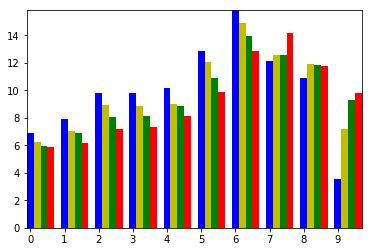

In [68]:
def question3_2(bookingHistory):
    buckets = np.split(bookingHistory,4)
    res = []
    for bucket in buckets:
        res.append(np.apply_along_axis(getAverage,0,bucket))

    return res

res = question3_2(bookingHistory)
width = 0.2
ax = plt.subplot(111)
ax.bar(np.arange(10),res[0],width,color='b')
ax.bar(np.arange(10)+width,res[1],width,color='y')
ax.bar(np.arange(10)+width*2,res[2],width,color='g')
ax.bar(np.arange(10)+width*3,res[3],width,color='r')
ax.autoscale(tight=True)

plt.xticks(np.arange(10))
plt.show()

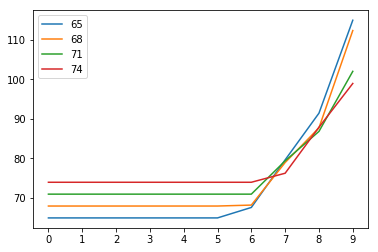

<Figure size 1440x1440 with 0 Axes>

In [69]:
def question3_3(fareHistory):
    buckets = np.split(fareHistory,4)
    res = []
    for bucket in buckets:
        res.append(np.apply_along_axis(getAverage,0,bucket))

    return res

res = question3_3(fareHistory)
timeperiod = np.arange(10)
for rate_of_fares in res:
    ax = plt.plot(timeperiod,rate_of_fares)

plt.legend(['65','68','71','74'])
plt.xticks(np.arange(10))
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
plt.show()



# ----------------------

In [28]:
def getAverageElasticity(a):
    return np.nanmean(a)

def question4(bookingHistory,fareHistory):
    """
    Hard
    What is the price elasticity of demand at each period?
    Build a function that calculates this from the data
    Answer should be an array of floats
    """    
    price_elasticity = np.zeros(shape=[1000,9])
    
    for row in range(bookingHistory.shape[0]):
        first = True
        for col in range(bookingHistory.shape[1]):
            if(first == True):
                first = False
            else:
                ## This is the calculation for price elasticity ##
                change_in_qty = bookingHistory[row][col] - bookingHistory[row][col-1]
                total_qty = bookingHistory[row][col] + bookingHistory[row][col-1]
                change_in_price = fareHistory[row][col] - fareHistory[row][col-1]
                total_price = fareHistory[row][col] + fareHistory[row][col-1]
                if(change_in_price.astype(int) != 0):
                    price_elasticity[row][col-1] = abs((change_in_qty/total_qty)/(change_in_price/total_price))*100
                else:
                    price_elasticity[row][col-1] = np.nan
        
    price_elasticity_avg = np.apply_along_axis(getAverageElasticity,0,price_elasticity)    
    
    return price_elasticity_avg

print(question4(bookingHistory,fareHistory))

[         nan          nan          nan          nan          nan
 106.94255617 159.53217968 177.60192263 254.49332546]


/Users/udbhavsahai/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: Mean of empty slice
  


##### Drawing conclusions
The prices for the first 5 time periods is unchanged. As such, we are unable to calculate the price elasticity for those periods.

Moving forward, our calculations show that the periods during which the prices are not stagnated, the elasticity for demand is greater than 1. Therefore, the prices can be deemed as highly elastic. 

--- Question 5 
---

In [53]:
# This is the same as the one above, added with a few thoughts and comments that I had from my understanding
# of what the function does

def calculate_sales(period,fare):
    table = [[10948.203698364247, -1.7618718586337401],
         [12316.724154672282, -1.7618717557777104],
         [27227.757147460881, -1.9069276555536103],
         [27227.757147460881, -1.9069276555536103],
         [31923.373918589208, -1.9259216939097417],
         [96784.984473477307, -2.1392197997378548],
         [222801.30985081987, -2.2737725815790211],
         [473224.98690729542, -2.4112936860531948],
         [40392.333438497895, -1.8195040367267661],
         [18371.836652604059, -1.6465484040077045]]
    a = table[period][0]
    b = table[period][1]
    seatsSold1 = max(0.0,a*fare**b)
    # Why use max? What is wrong with a*fare**b. I would use max, if there is a chance that 
    # there might be chance that a*fare**b will be negative
    # Its not possible that seatsSold1 will ever be negative, since 'a' is always positive 
    # and 'fare' is always positive from pricingSystem. Why is max used??
    
    seatsSold2 = np.random.poisson(seatsSold1)
    if seatsSold1 == seatsSold2:
        return seatsSold1
    elif seatsSold2 > seatsSold1:
        seatsSold2 = seatsSold2 + np.round((seatsSold1-seatsSold2-.5)/2.0,0)
    else:
        seatsSold2 = seatsSold2 + np.round((seatsSold1-seatsSold2+.5)/2.0,0)
    return seatsSold2

In [72]:
# The simulate_flights function is the same as above, but the variables have been replaced
# so that the new variables can be passed into the output without replacing the variables 
# from the original calculation

# I do not understand how I can incorporate the function into the solution, so I have left
# it there for the purpose of showing the question
def question5(period,bookings,fares):
    """
    Very Hard
    Design a pricing system that improves revenue above the best rule you found in 2
    To answer turn this function into something that outputs fare, like "pricingSystem" above.
    You may create your own version of simulateFlights to test it.
    The better the system, the higher you score on this question.
    """
    
    return fare

# Edited the pricingSystem calculation so that there will be a more comprehensive breakup for
# intermittent calculations
def pricingSystem(bookings,startingFare):
    if sum(bookings) < 60:
        fare = startingFare
    elif sum(bookings) < 65:
        fare = startingFare + 5
    elif sum(bookings) < 70:
        fare = startingFare + 10
    elif sum(bookings) < 80:
        fare = startingFare + 15
    elif sum(bookings) < 85:
        fare = startingFare + 20
    elif sum(bookings) < 90:
        fare = startingFare + 25
    else:
        fare = startingFare + 50
    return fare

def simulate_flights():
    number_of_flights = 1000
    starting_fares = np.ones(number_of_flights,float)
    starting_fares[:250] = 65
    starting_fares[250:500] = 68
    starting_fares[500:750] = 71
    starting_fares[750:] = 74
    
    booking_history = np.zeros([number_of_flights,10],float)
    fare_history = np.zeros([number_of_flights,10],float)
    
    for flightNum in range(number_of_flights):
        for period in range(10):
            fare_history[flightNum,period] = pricingSystem(booking_history[flightNum,:],starting_fares[flightNum])
            tempBookings = calculate_sales(period,fare_history[flightNum,period])
            if tempBookings + np.sum(booking_history[flightNum,:]) <= 100.0:
                booking_history[flightNum,period] = tempBookings
            else:
                booking_history[flightNum,period] = 100.0 - sum(booking_history[flightNum,:])
    return starting_fares,booking_history,fare_history

np.random.seed(19)
starting_fares,booking_history,fare_history = simulateFlights()

print(question2(booking_history,fare_history))

[9378.628]
